# Assignment 2 - Machine Learning Basics

## *Yifan Li*
Netid:  *yl506*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**(a)** Better. Fitting a more flexible model requires estimating a greater number of parameters, thus a more flexible model performs better with large sample size.

**(b)** Worse. A more flexible model may overfit the data if the number of observations is small.

**(c)** Better. A more non-linear model has more degrees of freedom and is more flexible.

**(d)** Worse. In general, more flexible statistical methods have higher variance.


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


**(a)**. (1). Regression. Because in this scenario, we have a quantitative response(CEO salary).
     (2). Inference. Because we are trying to figure out what variables affect the CEO salary and obtain the relationship between them.
     (3). n: the 500 firms in the US. p: each firm's profit, number of employees and industry.
     
**(b)**. (1). Classification. Here we are interested in the qualitative response (predicting the product's success).
     (2). Prediction. Here we are interested in the specific prediction result of success or failure.
     (3). n: 20 similar products. p: each product's price, market budget, competition price, and other 10 variables.
     
**(c)**. (1). Regression. Here, we are interested in the quantitative response(% change)
     (2). Prediction. Here, we want to determine the specific percent change in the US dollar, which is a quantitative output. 
     (3). n: Weekly data for all of 2012. p: percent change in the dollar, percent change in the US market, British market and German market.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [22]:
# (a) Write your own kNN classifier
import numpy as np
import pandas as pd
from collections import Counter
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self, k):
        self.k = k
    def fit(self, X_train, y_train, X_test):
        # Save the training data to properties of this class
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
    def predict(self, X_train, y_train, x_test, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        distances = []
        for i in range(len(X_train)):
            distance = np.sqrt(np.sum(np.square(x_test - X_train[i, :])))
            distances.append([distance, i])
            
        distances = sorted(distances)
        for i in range(k):
            index = distances[i][1]
            y_hat.append(y_train[index])
            
        return Counter(y_hat).most_common()[0][0]
        # Return the estimated targets
    def myKNN(self, X_train, y_train, X_test, k):
        prediction = []
        for i in range(len(X_test)):
            predictedvalue = self.predict(X_train, y_train, X_test[i,:], k)
            prediction.append(predictedvalue)
            
        return prediction    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


In [23]:
# (b). Load dataset and train my own classifier and
# (c). Train my classifier on the datasets
import time
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
k = 5
# import datasets
predictions_low = []
X_train_low = np.array(pd.read_csv('./data/A1_X_train_low.csv', header=None))
y_train_low = np.array(pd.read_csv('./data/A1_y_train_low.csv', header=None))
X_test_low = np.array(pd.read_csv('./data/A1_X_test_low.csv', header=None))
y_test_low = np.array(pd.read_csv('./data/A1_y_test_low.csv', header=None))
# train my classifier and record time
start1_low = time.time()
myknn = Knn(k)
myknn.fit(X_train_low, np.ravel(y_train_low), X_test_low)
predictions_low = myknn.myKNN(X_train_low, np.ravel(y_train_low), X_test_low, k)
end1_low = time.time()
print("(C).\n")
print("When training on the low dimensional dataset,")
print("the accuracy of my own KNN classifier is", accuracy(np.ravel(y_test_low), predictions_low))
print("And the computation time of my own kNN classifier is %.5f"%(end1_low-start1_low), "s")
##--------------train my own classifier on high dimensional dataset-------------------
predictions_high = []
X_train_high = np.array(pd.read_csv('./data/A1_X_train_high.csv', header=None))
y_train_high = np.array(pd.read_csv('./data/A1_y_train_high.csv', header=None))
X_test_high = np.array(pd.read_csv('./data/A1_X_test_high.csv', header=None))
y_test_high = np.array(pd.read_csv('./data/A1_y_test_high.csv', header=None))

start1_high = time.time()
myknn = Knn(k)
myknn.fit(X_train_high, np.ravel(y_train_high), X_test_high)
predictions_high = myknn.myKNN(X_train_high, np.ravel(y_train_high), X_test_high, k)
end1_high = time.time()

print("\nWhen training on the high dimensional dataset,")
print("the accuracy of my own KNN classifier is", accuracy(np.ravel(y_test_high), predictions_high))
print("And the computation time of my own kNN classifier is %.5f"%(end1_high-start1_high), "s")


(C).

When training on the low dimensional dataset,
the accuracy of my own KNN classifier is 0.925
And the computation time of my own kNN classifier is 8.07908 s

When training on the high dimensional dataset,
the accuracy of my own KNN classifier is 0.993
And the computation time of my own kNN classifier is 8.93171 s


In [24]:
# (d). Computation performance and accuracy measurement of scikitlearn KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time
from sklearn.metrics import accuracy_score
##--------------train sklearn's classifier on low dimensional dataset-------------------
predictions_low = []
X_train_low = np.array(pd.read_csv('./data/A1_X_train_low.csv', header=None))
y_train_low = np.array(pd.read_csv('./data/A1_y_train_low.csv', header=None))
X_test_low = np.array(pd.read_csv('./data/A1_X_test_low.csv', header=None))
y_test_low = np.array(pd.read_csv('./data/A1_y_test_low.csv', header=None))

start2_low = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_low, np.ravel(y_train_low))
predictions_low = knn.predict(X_test_low)
end2_low = time.time()
print("(d).\n")
print("When training on the low dimensional dataset,")
print("the accuracy of sklearn's KNN classifier is", accuracy_score(y_test_low, predictions_low))
print("The computation time of sklearn's kNN classifier is %.5f"%(end2_low-start2_low), "s")
##--------------train sklearn's classifier on high dimensional dataset-------------------
predictions_high = []
X_train_high = np.array(pd.read_csv('./data/A1_X_train_high.csv', header=None))
y_train_high = np.array(pd.read_csv('./data/A1_y_train_high.csv', header=None))
X_test_high = np.array(pd.read_csv('./data/A1_X_test_high.csv', header=None))
y_test_high = np.array(pd.read_csv('./data/A1_y_test_high.csv', header=None))

start2_high = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_high, np.ravel(y_train_high))
predictions_high = knn.predict(X_test_high)
end2_high = time.time()

print("\nWhen training on the high dimensional dataset,")
print("the accuracy of sklearn's KNN classifier is", accuracy_score(y_test_high, predictions_high))
print("The computation time of sklearn's kNN classifier is %.5f"%(end2_high-start2_high), "s")


(d).

When training on the low dimensional dataset,
the accuracy of sklearn's KNN classifier is 0.925
The computation time of sklearn's kNN classifier is 0.00499 s

When training on the high dimensional dataset,
the accuracy of sklearn's KNN classifier is 0.993
The computation time of sklearn's kNN classifier is 0.20057 s


**ANSWER**:

All measurement results were printed in previous blocks/cells.

**(d)**. My own KNN classifier accomplished the same accuracy as sklearn's. However, sklearn's classifier has much faster runtime than mine.

**(e)**. The drawback of the prediction process being slow is that as the sample size increases, the algorithm's computation time increases enormously and even become impractical to train and test large datasets.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [25]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

# (a) Calcualte the Euclidean distance
x_test = np.array([0, 0, 0])
distances = []
for i in range(len(X)):
    distance = np.sqrt(np.sum(np.square(x_test - X[i, :])))
    distances.append(distance)
    
print(np.array(distances))

[ 3.          2.          3.16227766  2.23606798  1.41421356  1.73205081]


**ANSWER**:

**(a)**

| Obs. | $x_1$ | $x_2$ | $x_3$ | Dist.| $y$ |
|------|-------|-------|-------|-------|------|
| **1**| 0     | 3     | 0     | 3   |r|
| **2**| 2     | 0     | 0     | 2   |r|
| **3**| 0     | 1     | 3     | 3.162   |r|
| **4**| 0     | 1     | 2     | 2.236  |b|
| **5**| -1    | 0     | 1     | 1.414  |b|
| **6**| 1     | 1     | 1     | 1.732   |r|

**(b)**. From the calculation results shown above, when $K=1$, we choose the nearest point
    which is $(-1, 0, 1)$ since it has the shortest distance to $(0,0,0)$. And the prediction result
    is blue.
    
**(c)**. When $K=3$, we choose three nearest points which are observation 5, observation 6 and observation 2 respectively. Among these 3 points, two are red and 1 is blue, so the prediction is Red.

**(d)**. Small. A smaller K represents more flexible model that fits a non-linear decision boundary.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

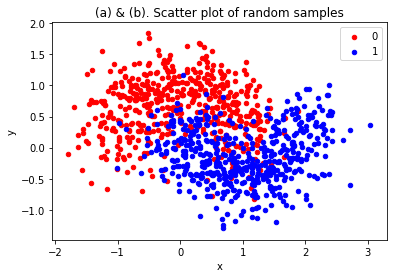

In [26]:
import numpy as np
from matplotlib import pyplot
from sklearn.datasets import make_moons
from pandas import DataFrame
# generate 2d classification dataset
X,y = make_moons(n_samples=1000, noise=0.35)

# scatter plot
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.title('(a) & (b). Scatter plot of random samples')
pyplot.show()

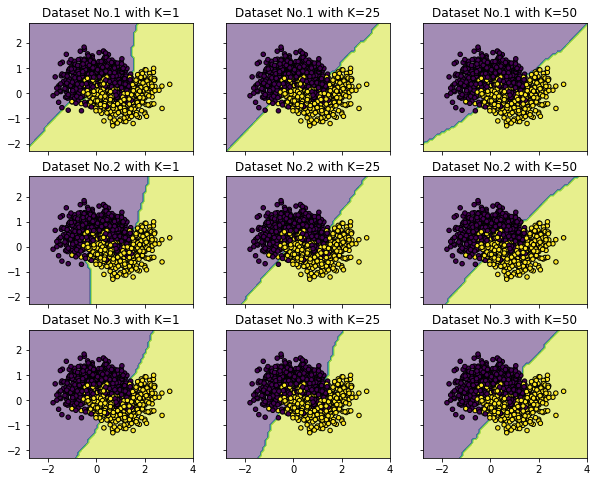

In [27]:
# (c). & (d). 9 combinations
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from itertools import product
# generate 100 random indices
subset1_indices = np.random.choice(1000, 100, replace=False); 
subset2_indices = np.random.choice(1000, 100, replace=False); 
subset3_indices = np.random.choice(1000, 100, replace=False); 

k1 = 1
k2 = 25
k3 = 50
# use the generated random indices to index the 100 sample points
X_train_s1 = X[subset1_indices]
X_train_s2 = X[subset2_indices]
X_train_s3 = X[subset3_indices]
y_train_s1 = y[subset1_indices]
y_train_s2 = y[subset2_indices]
y_train_s3 = y[subset3_indices]
###### training KNN classifiers
knn1_1 = KNeighborsClassifier(n_neighbors=k1)
knn1_25 = KNeighborsClassifier(n_neighbors=k2)
knn1_50 = KNeighborsClassifier(n_neighbors=k3)
knn2_1 = KNeighborsClassifier(n_neighbors=k1)
knn2_25 = KNeighborsClassifier(n_neighbors=k2)
knn2_50 = KNeighborsClassifier(n_neighbors=k3)
knn3_1 = KNeighborsClassifier(n_neighbors=k1)
knn3_25 = KNeighborsClassifier(n_neighbors=k2)
knn3_50 = KNeighborsClassifier(n_neighbors=k3)

knn1_1.fit(X_train_s1, y_train_s1)
knn1_25.fit(X_train_s1, y_train_s1)
knn1_50.fit(X_train_s1, y_train_s1)
knn2_1.fit(X_train_s2, y_train_s2)
knn2_25.fit(X_train_s2, y_train_s2)
knn2_50.fit(X_train_s2, y_train_s2)
knn3_1.fit(X_train_s3, y_train_s3)
knn3_25.fit(X_train_s3, y_train_s3)
knn3_50.fit(X_train_s3, y_train_s3)
# plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(10, 8))
for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]),
                        [knn1_1, knn1_25, knn1_50, knn2_1, knn2_25, knn2_50, knn3_1, knn3_25, knn3_50],
                        ['Dataset No.1 with K=1', 'Dataset No.1 with K=25', 'Dataset No.1 with K=50',
                         'Dataset No.2 with K=1', 'Dataset No.2 with K=25', 'Dataset No.2 with K=50',
                         'Dataset No.3 with K=1', 'Dataset No.3 with K=25', 'Dataset No.3 with K=50']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.5)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                          s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**ANSWER**

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

If we focus on a specific row and compare the decision boundaries shown in different columns, we can see that as K increases, the boundary becomes more and more linear. If we fix the column and compare boundaries in different rows, we can see that there is not specific pattern since all 3 datasets were randomly generated.

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

The choice of K has a drastic effect on the KNN classifier obtained. The plots above display 3 KNN fits to the 3 different datasets, using K = 1, K = 25 and K = 50. When K = 1, the decision boundary is overly flexible and this corresponds to a classifier that has low bias but very high variance. As K grows, the method becomes less flexible and produces a decision boundary that is close to linear. This corresponds to a low-variance but high-bias classifier. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...,500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

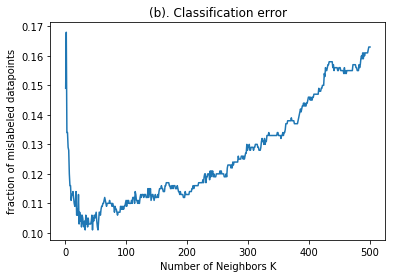

The optimal value of K is 33


In [29]:
# (a). & (b).
import numpy as np
from matplotlib import pyplot
from sklearn.datasets import make_moons
from pandas import DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# generate 2d classification dataset
X_testset,y_testset = make_moons(n_samples=1000, noise=0.35)
Ks = list(range(1, 501))
predictions = []
error_rate = []
for k in Ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    predictions = knn.predict(X_testset)
    error_rate.append(accuracy_score(y_testset, predictions))


# changing to misclassification error
error_rate = [1 - x for x in error_rate]

# plot classification error
plt.plot(Ks, error_rate)
plt.xlabel('Number of Neighbors K')
plt.title('(b). Classification error')
plt.ylabel('fraction of mislabeled datapoints')
plt.show()

optimal_k = Ks[error_rate.index(min(error_rate))]
print ("The optimal value of K is %d" %optimal_k)

**ANSWER**

**(c)** 
The classification error generally exhibits a "U" shape. The error rate initially drastically decreases as K increases, but later starts gradually increasing along with K.

**(d)** 
Smaller k corresponds to more flexible methods that represents high variance. Large K such as 500 represents high bias.

**(e)** 
From the plot, we can see that the classification error is minimized when k is 33.

**(f)** 
Some possible factors include the sample size, the number of predictors, the relationship between the predictors and response, and the variance of the error terms.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

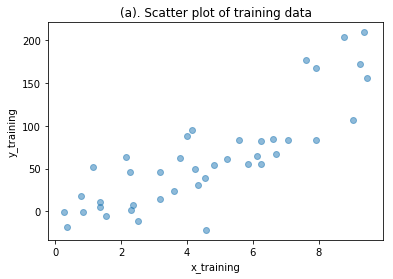

Slope a1: 
 [[ 18.30320685]]
Intercept a0: 
 [-21.73078293]
Mean squared error: 1052.59
Variance score: 0.70


Nonlinear coefficients: [ 6.87117503  1.78444519  3.72029361]


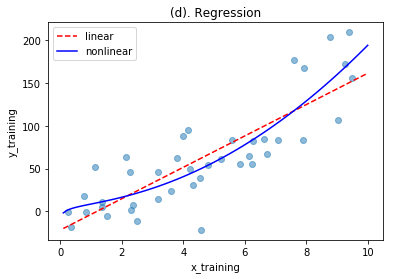

Mean squared error: 880.90
Variance score: 0.75


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

# (a). Scatter plot of training data
plt.scatter(x_train, y_train, alpha=0.5)
plt.title("(a). Scatter plot of training data")
plt.xlabel("x_training")
plt.ylabel("y_training")
plt.show()

# (b). Estimate a linear regression model
x_train_reshaped = (np.array(x_train)).reshape(-1,1)
y_train_reshaped = (np.array(y_train)).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x_train_reshaped, y_train_reshaped)
y_pred = regr.predict(x_train_reshaped)
print('Slope a1: \n', regr.coef_) # The coefficients
print('Intercept a0: \n', regr.intercept_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_train_reshaped, y_pred)) # The mean squared error
print('Variance score: %.2f' % r2_score(y_train_reshaped, y_pred)) # The R^2 value


# (c).Multiple regression model
from numpy import *
from scipy.optimize import curve_fit

def f(x, a0, a1, a2):
    return a0+a1*x**2+a2*log(x)

a = curve_fit(f,np.array(x_train),np.array(y_train))[0]
print('\n\nNonlinear coefficients:', a)
p1 = np.polyfit(x_train, y_train, 1)
# (d). plot regression models
xp = np.linspace(0.1,10,100)
%matplotlib inline
plt.scatter(x_train, y_train, alpha=0.5)
plt.plot(xp, np.polyval(p1,xp), 'r--', label='linear')
plt.plot(xp, f(xp, a[0], a[1], a[2]), 'b-', label='nonlinear')
plt.legend(loc='best')
plt.title("(d). Regression")
plt.xlabel("x_training")
plt.ylabel("y_training")
plt.show()

y_pred_nonlinear = []
for x in x_train:
    y_pred_nonlinear.append(f(x, a[0],a[1],a[2]))
print("Mean squared error: %.2f" 
      % mean_squared_error(y_train_reshaped, y_pred_nonlinear)) # The mean squared error
print('Variance score: %.2f' % r2_score(y_train_reshaped, y_pred_nonlinear)) # The R^2 value



In [20]:
#(e). estimate test data using previous models
y_test_reshaped = (np.array(y_test)).reshape(-1,1)
x_test_reshaped = (np.array(x_test)).reshape(-1,1)
y_pred_test = regr.predict(x_test_reshaped)

print('Applying previous linear model to test data:')
print("Mean squared error: %.2f" 
      % mean_squared_error(y_test_reshaped, y_pred_test)) # The mean squared error
print('Variance score: %.2f' % r2_score(y_test_reshaped, y_pred_test)) # The R^2 value

print('\nApplying previous nonlinear model to test data:')
y_pred_nonlinear_test = []
for x in x_test:
    y_pred_nonlinear_test.append(f(x, a[0],a[1],a[2]))
print("Mean squared error: %.2f" 
      % mean_squared_error(y_test_reshaped, y_pred_nonlinear_test)) # The mean squared error
print('Variance score: %.2f' % r2_score(y_test_reshaped, y_pred_nonlinear_test)) # The R^2 value


Applying previous linear model to test data:
Mean squared error: 2023.31
Variance score: 0.56

Applying previous nonlinear model to test data:
Mean squared error: 1467.69
Variance score: 0.68


**ANSWER**

**(b)**. The estimated linear model: $y = 18.3032x - 21.73$. MSE = 1052.59, and R^2 value = 0.70

**(c)**. The estimated nonlinear model: $y = 6.871 + 1.7844x^2 +3.7203log(x)$. MSE = 880.9, and R^2 = 0.75

**(e)**. After applying both models to test data, we got the MSE of 2023.31 and R^2 of 0.56 for linear model, and we got MSE of 1467.69 and R^2 of 0.68 for nonlinear model.

**(f)**. It turns out that nonlinear model performs better on both training data and test data. Both datasets are generally not very linear, and the nonlinear model is more flexible and thus predicts target more accurately.

**(g)**. If the test dataset is very different from the training dataset, then the predictive capability of my models might differ a lot. These two datasets may have completely different or even opposite distribution of data points. And since my models were built based on the training set, my model could perform very poorly on test dataset. The MSE will be large if for some of the observations, the predicted and true responses differ substantially.